In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

from fastai import *
from fastai.vision import *
from fastai.vision.gan import *
from superRes.generators import *
from superRes.critics import *
from superRes.dataset import *
from superRes.loss import *
from superRes.save import *
from superRes.fid_loss import *
from superRes.ssim import *
from superRes.metrics import *

import torchvision
import geffnet # efficient/ mobile net

In [2]:
def save_preds(dl, path_gen, learn):
    i=0
    names = dl.dataset.items
    
    for b in dl:
        preds = learn.pred_batch(batch=b, reconstruct=True, ds_type=DatasetType.Valid)
        for o in preds:
            o.save(path_gen/names[i].name)
            print(path_gen/names[i].name)
            i += 1
            

def save_gen_images(data_gen, path_gen, learn):
    if path_gen.exists(): shutil.rmtree(path_gen)
    path_gen.mkdir(exist_ok=True)
    save_preds(data_gen.fix_dl, path_gen, learn)
    save_preds(data_gen.valid_dl, path_gen, learn)

In [3]:
def get_DIV2k_data_Input(pLow, pFull, bs: int, sz: int):
    """Given the path of low resolution images
       returns a databunch
    """
    src = ImageImageList.from_folder(pLow, presort=True).split_by_idxs(
        train_idx=list(range(0, 800)), valid_idx=list(range(800, 900)))

    data = (src.label_from_func(
        lambda x: pFull/(x.name.replace(".jpg", ".png"))
    ).transform(
        size=sz,
        tfm_y=True,
    ).databunch(bs=bs, num_workers=8, no_check=True)
        .normalize(imagenet_stats, do_y=True))
    data.c = 3
    return data

In [4]:
path = Path('./dataset/')

path_fullRes = path/'DIV2K_train_HR'

path_lowRes_512 = path/'DIV2K_train_LR_512_QF20'

# Input imgs

In [5]:
proj_id = 'unet_superRes_mobilenetV3_Input'

path_input = path/(proj_id + '_image_gen')
path_input

PosixPath('dataset/unet_superRes_mobilenetV3_Input_image_gen')

In [17]:
bs=1
sz=512
nf_factor = 2

data_gen = get_DIV2k_data_Input(path_lowRes_512, path_fullRes, bs=bs, sz=sz)

if path_input.exists(): shutil.rmtree(path_input)
path_input.mkdir(exist_ok=True)
i=0
names = data_gen.fix_dl.dataset.items
for img in data_gen.fix_dl.dataset:
    img[0].save(path_input/names[i].name)
    print(path_input/names[i].name)
    i += 1

i=0
names = data_gen.valid_dl.dataset.items
for img in data_gen.valid_dl.dataset:
    img[0].save(path_input/names[i].name)
    print(path_input/names[i].name)
    i += 1

dataset/unet_superRes_mobilenetV3_Input_image_gen/0001.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0002.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0003.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0004.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0005.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0006.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0007.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0008.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0009.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0010.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0011.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0012.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0013.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0014.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0015.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0016.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0017.j

dataset/unet_superRes_mobilenetV3_Input_image_gen/0140.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0141.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0142.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0143.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0144.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0145.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0146.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0147.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0148.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0149.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0150.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0151.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0152.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0153.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0154.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0155.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0156.j

dataset/unet_superRes_mobilenetV3_Input_image_gen/0279.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0280.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0281.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0282.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0283.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0284.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0285.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0286.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0287.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0288.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0289.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0290.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0291.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0292.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0293.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0294.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0295.j

dataset/unet_superRes_mobilenetV3_Input_image_gen/0418.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0419.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0420.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0421.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0422.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0423.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0424.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0425.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0426.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0427.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0428.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0429.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0430.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0431.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0432.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0433.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0434.j

dataset/unet_superRes_mobilenetV3_Input_image_gen/0557.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0558.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0559.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0560.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0561.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0562.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0563.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0564.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0565.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0566.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0567.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0568.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0569.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0570.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0571.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0572.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0573.j

dataset/unet_superRes_mobilenetV3_Input_image_gen/0696.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0697.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0698.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0699.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0700.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0701.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0702.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0703.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0704.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0705.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0706.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0707.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0708.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0709.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0710.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0711.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0712.j

dataset/unet_superRes_mobilenetV3_Input_image_gen/0835.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0836.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0837.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0838.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0839.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0840.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0841.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0842.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0843.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0844.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0845.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0846.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0847.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0848.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0849.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0850.jpg
dataset/unet_superRes_mobilenetV3_Input_image_gen/0851.j

# SSIM

In [ ]:
proj_id = 'unet_superRes_mobilenetV3_SSIM'

path_ssim = path/(proj_id + '_image_gen')
path_ssim

In [ ]:
model = geffnet.mobilenetv3_rw
loss_func = SSIM()

bs=1
sz=512
nf_factor = 2

data_gen = get_DIV2k_data_QF(path_lowRes_512, path_fullRes, bs=bs, sz=sz)

learn_gen = gen_learner_wide(data=data_gen,
                                 gen_loss=loss_func,
                                 arch = model,
                                 nf_factor=nf_factor)

weights = "/data/students_home/fmameli/repos/SuperRes/models/unet_superRes_mobilenetV3_SSIM_gen_512px_0"
learn_gen.load(weights, with_opt=False)

save_gen_images(data_gen, path_ssim, learn_gen)

# MSE

In [4]:
proj_id = 'unet_superRes_mobilenetV3_MSE'

path_mse = path/(proj_id + '_image_gen')
path_mse

PosixPath('dataset/unet_superRes_mobilenetV3_MSE_image_gen')

In [6]:
model = geffnet.mobilenetv3_rw
loss_func = nn.MSELoss()

bs=1
sz=512
nf_factor = 2

data_gen = get_DIV2k_data_QF(path_lowRes_512, path_fullRes, bs=bs, sz=sz)

learn_gen = gen_learner_wide(data=data_gen,
                                 gen_loss=loss_func,
                                 arch = model,
                                 nf_factor=nf_factor)

weights = "/data/students_home/fmameli/repos/SuperRes/models/unet_superRes_mobilenetV3_SSIM_gen_512px_0"
learn_gen.load(weights, with_opt=False)

save_gen_images(data_gen, path_mse, learn_gen)

dataset/unet_superRes_mobilenetV3_MSE_image_gen/0001.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0002.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0003.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0004.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0005.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0006.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0007.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0008.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0009.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0010.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0011.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0012.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0013.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0014.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0015.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0016.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0017.jpg
dataset/unet_superRes_mobilenet

dataset/unet_superRes_mobilenetV3_MSE_image_gen/0145.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0146.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0147.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0148.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0149.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0150.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0151.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0152.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0153.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0154.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0155.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0156.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0157.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0158.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0159.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0160.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0161.jpg
dataset/unet_superRes_mobilenet

dataset/unet_superRes_mobilenetV3_MSE_image_gen/0289.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0290.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0291.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0292.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0293.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0294.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0295.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0296.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0297.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0298.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0299.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0300.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0301.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0302.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0303.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0304.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0305.jpg
dataset/unet_superRes_mobilenet

dataset/unet_superRes_mobilenetV3_MSE_image_gen/0433.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0434.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0435.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0436.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0437.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0438.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0439.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0440.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0441.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0442.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0443.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0444.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0445.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0446.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0447.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0448.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0449.jpg
dataset/unet_superRes_mobilenet

dataset/unet_superRes_mobilenetV3_MSE_image_gen/0577.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0578.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0579.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0580.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0581.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0582.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0583.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0584.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0585.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0586.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0587.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0588.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0589.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0590.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0591.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0592.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0593.jpg
dataset/unet_superRes_mobilenet

dataset/unet_superRes_mobilenetV3_MSE_image_gen/0721.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0722.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0723.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0724.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0725.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0726.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0727.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0728.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0729.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0730.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0731.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0732.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0733.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0734.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0735.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0736.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0737.jpg
dataset/unet_superRes_mobilenet

dataset/unet_superRes_mobilenetV3_MSE_image_gen/0865.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0866.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0867.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0868.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0869.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0870.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0871.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0872.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0873.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0874.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0875.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0876.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0877.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0878.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0879.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0880.jpg
dataset/unet_superRes_mobilenetV3_MSE_image_gen/0881.jpg
dataset/unet_superRes_mobilenet

# LPIPS Patch

In [16]:
proj_id = 'unet_superRes_mobilenetV3_LPIPS_Patch'

path_lpips_patch = path/(proj_id + '_image_gen')
path_lpips_patch

PosixPath('dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen')

In [17]:
model = geffnet.mobilenetv3_rw
loss_func = lpips_loss()

bs=2
sz=512
nf_factor = 2

data_gen = get_DIV2k_data_QF(path_lowRes_512, path_fullRes, bs=bs, sz=sz)

learn_gen = gen_learner_wide(data=data_gen,
                                 gen_loss=loss_func,
                                 arch = model,
                                 nf_factor=nf_factor)

learn_gen.load("/data/students_home/fmameli/repos/SuperRes/models/unet_wideNf2_superRes_mobilenetV3_Patches64px_gen_64px_0")

save_gen_images(data_gen, path_lpips_patch, learn_gen)

Setting up Perceptual loss...
Loading model from: /data/students_home/fmameli/anaconda3/envs/fastai/lib/python3.6/site-packages/perceptual_similarity/weights/v0.1/alex.pth
...[net-lin [alex]] initialized
...Done
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0001.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0002.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0003.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0004.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0005.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0006.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0007.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0008.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0009.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0010.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0011.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0012.jpg
dataset/

dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0125.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0126.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0127.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0128.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0129.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0130.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0131.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0132.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0133.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0134.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0135.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0136.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0137.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0138.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0139.jpg
dataset/unet_superRes_mob

dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0253.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0254.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0255.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0256.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0257.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0258.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0259.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0260.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0261.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0262.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0263.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0264.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0265.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0266.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0267.jpg
dataset/unet_superRes_mob

dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0381.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0382.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0383.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0384.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0385.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0386.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0387.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0388.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0389.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0390.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0391.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0392.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0393.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0394.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0395.jpg
dataset/unet_superRes_mob

dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0509.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0510.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0511.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0512.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0513.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0514.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0515.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0516.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0517.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0518.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0519.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0520.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0521.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0522.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0523.jpg
dataset/unet_superRes_mob

dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0637.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0638.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0639.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0640.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0641.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0642.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0643.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0644.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0645.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0646.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0647.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0648.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0649.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0650.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0651.jpg
dataset/unet_superRes_mob

dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0765.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0766.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0767.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0768.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0769.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0770.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0771.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0772.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0773.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0774.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0775.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0776.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0777.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0778.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0779.jpg
dataset/unet_superRes_mob

dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0893.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0894.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0895.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0896.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0897.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0898.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0899.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_Patch_image_gen/0900.jpg


# LPIPS

In [4]:
proj_id = 'unet_superRes_mobilenetV3_LPIPS'

path_lpips = path/(proj_id + '_image_gen')
path_lpips

PosixPath('dataset/unet_superRes_mobilenetV3_LPIPS_image_gen')

In [5]:
model = geffnet.mobilenetv3_rw
loss_func = lpips_loss()

bs=2
sz=512
nf_factor = 2

data_gen = get_DIV2k_data_QF(path_lowRes_512, path_fullRes, bs=bs, sz=sz)

learn_gen = gen_learner_wide(data=data_gen,
                                 gen_loss=loss_func,
                                 arch = model,
                                 nf_factor=nf_factor)

weights = "/data/students_home/fmameli/repos/SuperRes/models/unet_superRes_mobilenetV3_LPIPS_Tuned_gen_512px_0"
learn_gen.load(weights, with_opt=False)

save_gen_images(data_gen, path_lpips, learn_gen)

Setting up Perceptual loss...
Loading model from: /data/students_home/fmameli/anaconda3/envs/fastai/lib/python3.6/site-packages/perceptual_similarity/weights/v0.1/alex.pth
...[net-lin [alex]] initialized
...Done
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0001.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0002.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0003.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0004.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0005.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0006.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0007.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0008.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0009.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0010.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0011.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0012.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0013.jpg
dataset/unet_superRes

dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0137.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0138.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0139.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0140.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0141.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0142.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0143.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0144.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0145.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0146.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0147.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0148.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0149.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0150.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0151.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0152.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0153.j

dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0277.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0278.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0279.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0280.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0281.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0282.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0283.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0284.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0285.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0286.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0287.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0288.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0289.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0290.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0291.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0292.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0293.j

dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0417.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0418.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0419.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0420.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0421.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0422.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0423.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0424.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0425.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0426.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0427.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0428.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0429.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0430.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0431.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0432.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0433.j

dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0557.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0558.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0559.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0560.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0561.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0562.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0563.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0564.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0565.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0566.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0567.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0568.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0569.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0570.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0571.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0572.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0573.j

dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0697.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0698.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0699.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0700.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0701.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0702.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0703.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0704.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0705.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0706.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0707.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0708.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0709.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0710.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0711.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0712.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0713.j

dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0837.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0838.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0839.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0840.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0841.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0842.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0843.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0844.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0845.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0846.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0847.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0848.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0849.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0850.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0851.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0852.jpg
dataset/unet_superRes_mobilenetV3_LPIPS_image_gen/0853.j

# GAN

In [18]:
proj_id = 'unet_superRes_mobilenetV3_GAN'

path_gan = path/(proj_id + '_image_gen')
path_gan

PosixPath('dataset/unet_superRes_mobilenetV3_GAN_image_gen')

In [19]:
model = geffnet.mobilenetv3_rw
loss_func = lpips_loss()

bs=2
sz=512
nf_factor = 2

data_gen = get_DIV2k_data_QF(path_lowRes_512, path_fullRes, bs=bs, sz=sz)

learn_gen = gen_learner_wide(data=data_gen,
                                 gen_loss=loss_func,
                                 arch = model,
                                 nf_factor=nf_factor)

weights = "/data/students_home/fmameli/repos/SuperRes/models/unet_superRes_mobilenetV3_LPIPS_Tuned_gen_512px_0"
learn_gen.load(weights, with_opt=False)

save_gen_images(data_gen, path_gan, learn_gen)

Setting up Perceptual loss...
Loading model from: /data/students_home/fmameli/anaconda3/envs/fastai/lib/python3.6/site-packages/perceptual_similarity/weights/v0.1/alex.pth
...[net-lin [alex]] initialized
...Done
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0001.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0002.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0003.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0004.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0005.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0006.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0007.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0008.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0009.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0010.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0011.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0012.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0013.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen

dataset/unet_superRes_mobilenetV3_GAN_image_gen/0143.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0144.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0145.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0146.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0147.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0148.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0149.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0150.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0151.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0152.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0153.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0154.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0155.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0156.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0157.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0158.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0159.jpg
dataset/unet_superRes_mobilenet

dataset/unet_superRes_mobilenetV3_GAN_image_gen/0287.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0288.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0289.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0290.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0291.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0292.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0293.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0294.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0295.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0296.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0297.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0298.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0299.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0300.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0301.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0302.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0303.jpg
dataset/unet_superRes_mobilenet

dataset/unet_superRes_mobilenetV3_GAN_image_gen/0431.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0432.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0433.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0434.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0435.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0436.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0437.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0438.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0439.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0440.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0441.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0442.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0443.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0444.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0445.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0446.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0447.jpg
dataset/unet_superRes_mobilenet

dataset/unet_superRes_mobilenetV3_GAN_image_gen/0575.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0576.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0577.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0578.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0579.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0580.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0581.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0582.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0583.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0584.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0585.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0586.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0587.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0588.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0589.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0590.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0591.jpg
dataset/unet_superRes_mobilenet

dataset/unet_superRes_mobilenetV3_GAN_image_gen/0719.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0720.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0721.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0722.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0723.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0724.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0725.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0726.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0727.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0728.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0729.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0730.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0731.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0732.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0733.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0734.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0735.jpg
dataset/unet_superRes_mobilenet

dataset/unet_superRes_mobilenetV3_GAN_image_gen/0863.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0864.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0865.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0866.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0867.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0868.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0869.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0870.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0871.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0872.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0873.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0874.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0875.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0876.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0877.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0878.jpg
dataset/unet_superRes_mobilenetV3_GAN_image_gen/0879.jpg
dataset/unet_superRes_mobilenet

# Test

In [13]:
model = geffnet.mobilenetv3_rw
loss_func = lpips_loss()

bs=2
sz=512
nf_factor = 2

path_lowRes_512 = path/'DIV2K_train_LR_512_QF20'
size=( 512, 680)

data_1k = (ImageImageList.from_folder(path_lowRes_512, presort=True).split_by_idxs(
            train_idx=list(range(0, 800)), valid_idx=list(range(800, 900)))
          .label_from_func(lambda x: path_fullRes/x.name.replace(".jpg", ".png"))
          .transform(get_transforms(), size=size, tfm_y=True)
          .databunch(bs=1).normalize(imagenet_stats, do_y=True))
data_1k.c = 3

learn_gen = gen_learner_wide(data=data_1k,
                                 gen_loss=loss_func,
                                 arch = model,
                                 nf_factor=nf_factor)

weights = "/data/students_home/fmameli/repos/SuperRes/models/unet_superRes_mobilenetV3_LPIPS_Tuned_gen_512px_0"
learn_gen.load(weights, with_opt=False)

Setting up Perceptual loss...
Loading model from: /data/students_home/fmameli/anaconda3/envs/fastai/lib/python3.6/site-packages/perceptual_similarity/weights/v0.1/alex.pth
...[net-lin [alex]] initialized
...Done


Learner(data=ImageDataBunch;

Train: LabelList (800 items)
x: ImageImageList
Image (3, 512, 680),Image (3, 512, 680),Image (3, 512, 680),Image (3, 512, 680),Image (3, 512, 680)
y: ImageList
Image (3, 512, 680),Image (3, 512, 680),Image (3, 512, 680),Image (3, 512, 680),Image (3, 512, 680)
Path: dataset/DIV2K_train_LR_512_QF20;

Valid: LabelList (100 items)
x: ImageImageList
Image (3, 512, 680),Image (3, 512, 680),Image (3, 512, 680),Image (3, 512, 680),Image (3, 512, 680)
y: ImageList
Image (3, 512, 680),Image (3, 512, 680),Image (3, 512, 680),Image (3, 512, 680),Image (3, 512, 680)
Path: dataset/DIV2K_train_LR_512_QF20;

Test: None, model=DynamicUnetWide(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): HardSwish()
      (3): Sequential(
        (0): Sequential(
          (0): DepthwiseSeparableConv(
 

In [6]:
fn = data_gen.valid_dl.x.items[2]; fn

PosixPath('dataset/DIV2K_train_LR_512_QF20/0803.jpg')

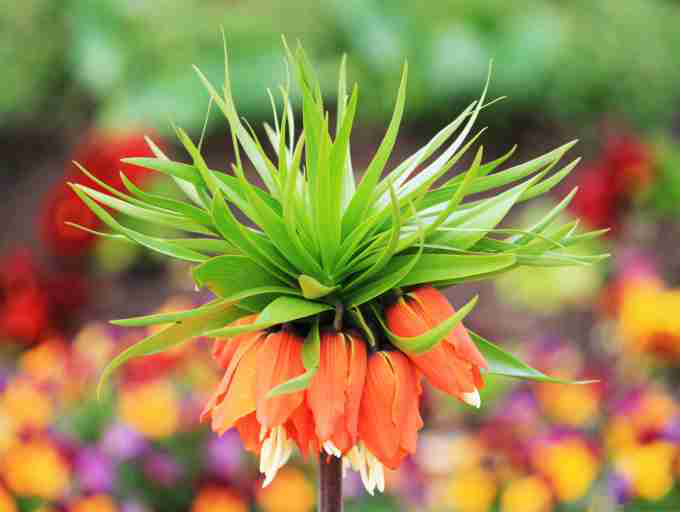

In [10]:
img = open_image(fn); img

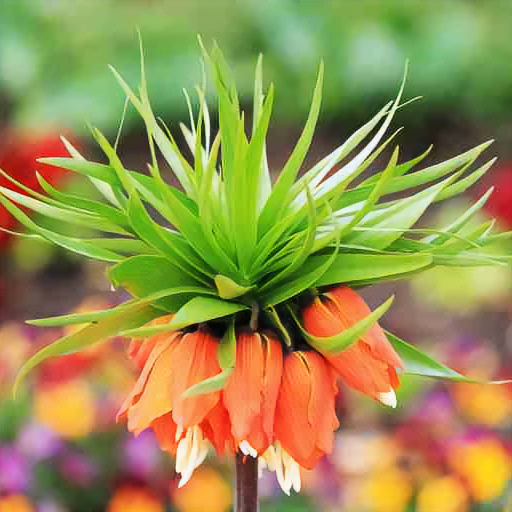

In [9]:
p,img_hr,b = learn_gen.predict(img); p